# Метод Монте-Карло в физике

Методом Монте-Карло называют целую множество различных метоедов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import math
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
(10% от общей оценки)

Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)} r^d
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [12]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R рекурентным методом

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    
    V = math.pi**(D/2)/sp.gamma(1+D/2)*R**(D)
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

<IPython.core.display.Javascript object>


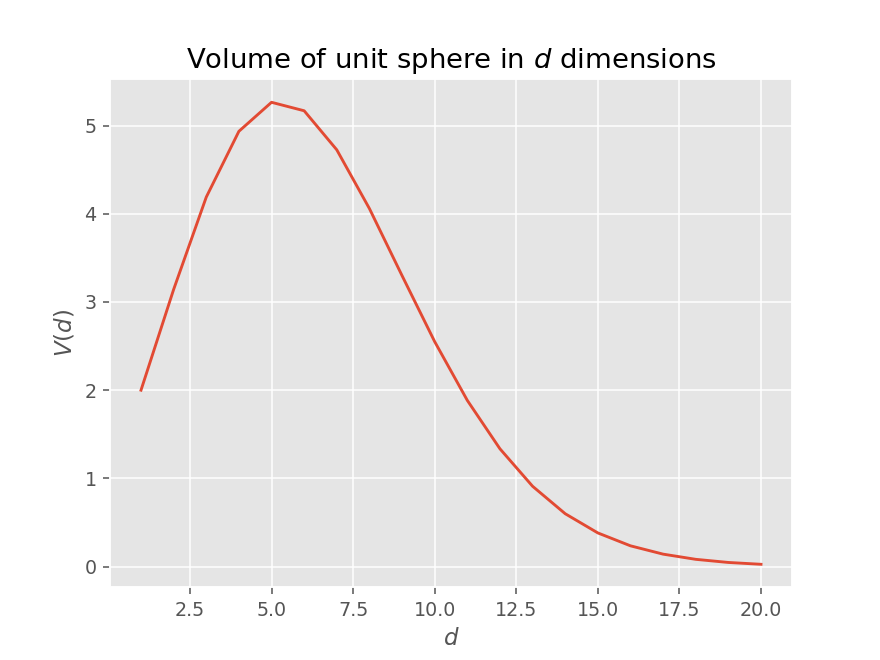

Text(0.5, 1.0, 'Volume of unit sphere in $d$ dimensions')

In [13]:
x = np.linspace(1, 20, 20)
V = [getSphereVolumeExact(x0) for x0 in x]

fig, ax = plt.subplots() 
ax.plot(x, V, label='V(d)')
ax.set_xlabel('$d$')  
ax.set_ylabel('$V(d)$')  
ax.set_title("Volume of unit sphere in $d$ dimensions")  

### Задание 1.2
(20% от общей оценки)

Напишите функцию, вычсляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [14]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    
    ### Получаем массив N точек внутри единичного D-мерного куба
    X = [2*np.random.rand(D)-np.ones(D) for n in range(N)]
    
    ### Получаем массив норм точек
    norms = [np.linalg.norm(X0) for X0 in X]
    
    ### Считаем число точек, попадающих в единичную сферу 
    K = 0
    for r in norms:
        if r <= 1:
            K+=1
            
    return K/N*2**(D)

Постройте график зависимости числа узлов $N$ при котором достигается относительная точность порядка $10^{-8}$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$. Для нахождения соответствующего $N$ используйте алгоритм удвоения $N$, который вы использовали для оценки точности интегралов в 6-ой домашней работе.

<IPython.core.display.Javascript object>


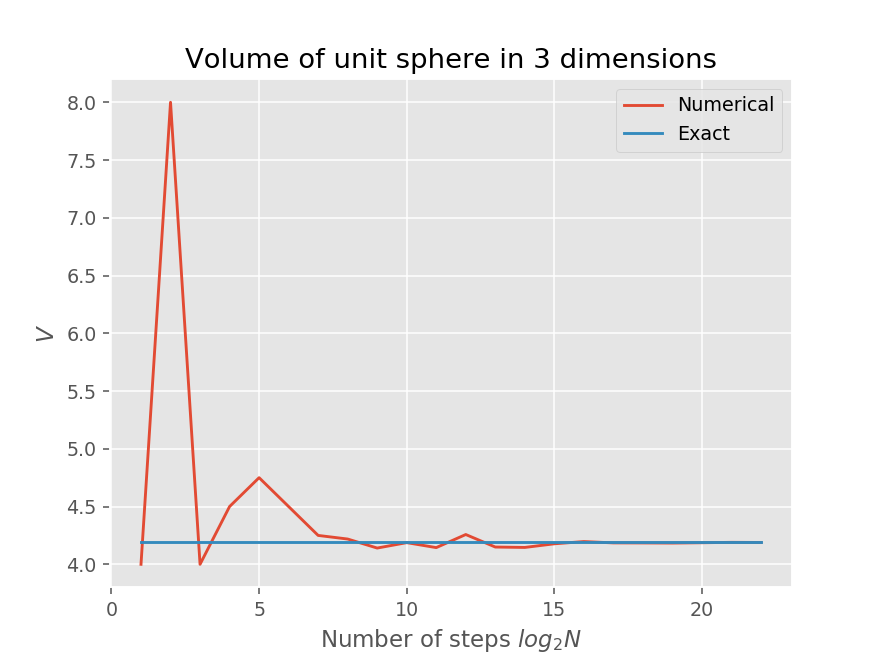

In [15]:
def get_accuracy(D, eps0 = 10e-5):
    N = [2,]
    Vrand = []
    Vrand.append(getSphereVolumePseudorandom(N[-1], D, R = 1))
    Vex = getSphereVolumeExact(D)
    eps = abs((Vex - Vrand[-1])/Vex)
    while eps > eps0:
        N.append(2*N[-1])
        Vrand.append(getSphereVolumePseudorandom(N[-1], D, R = 1))
        eps = abs((Vex - Vrand[-1])/Vex)
        
    return Vrand, N

# !!!<=PUT THERE YOUR D=>!!!
D = 3
Vrand, N  = get_accuracy(D)
Vex = [getSphereVolumeExact(D) for n in N]

Nlog = list(map(math.log2, N))

fig, ax = plt.subplots() 
ax.plot(Nlog, Vrand, label='Numerical')
ax.plot(Nlog, Vex, label='Exact')
ax.set_xlabel('Number of steps $log_2N$')  
ax.set_ylabel('$V$')  
ax.set_title(f"Volume of unit sphere in {D} dimensions")
ax.legend()

К сожалению, точность $10^{-8}$ мой компьютер не тянет - после часа ожидания не было результата.

### Задание 1.3

(20% от общей оценки)

Напишите функцию, вычсляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq` выполните команду 
`pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [16]:
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [17]:
sobol_seq.i4_sobol_generate?

In [34]:
import sobol_seq

def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    ### Получаем массив N точек внутри единичного D-мерного куба
    X = 2*sobol_seq.i4_sobol_generate(D, N)-np.ones((D, N))
    
    ### Получаем массив норм точек
    norms = [np.linalg.norm(X0) for X0 in X]
    
    ### Считаем число точек, попадающих в единичную сферу 
    K = 0
    for r in norms:
        if r <= 1:
            K+=1
            
    return K/N*2**(D)

Сравните точность вчисления объема для квазислучайной погрешности, построив такой же график $N(D)$ при которых достигается точность $10^{-8}$, как для псевдослучайных чисел.

<IPython.core.display.Javascript object>


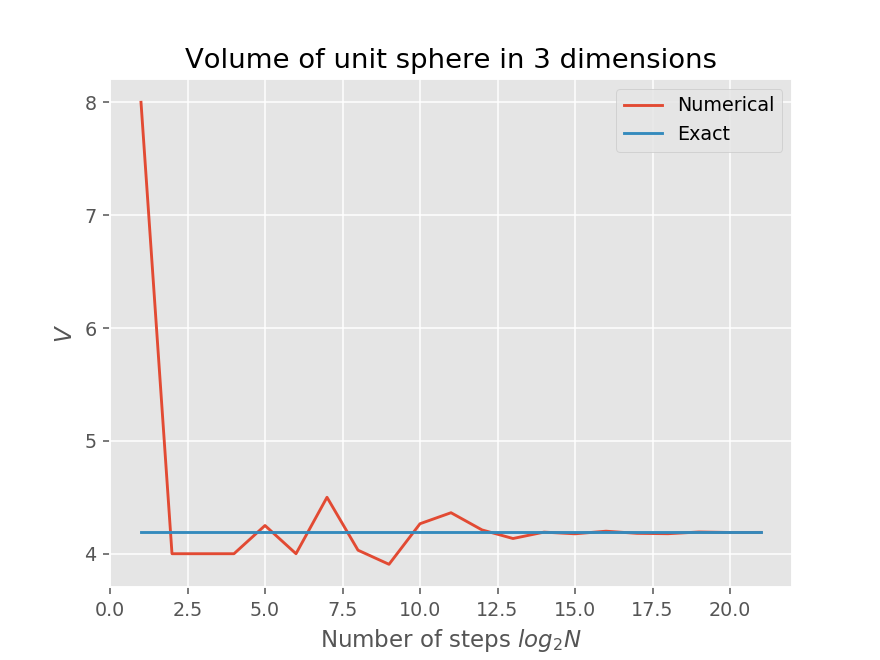

In [38]:
def get_accuracy_sobol(D, eps0 = 10e-8):
    N = [2,]
    Vrand = []
    Vrand.append(getSphereVolumeQuasirandom(N[-1], D, R = 1))
    Vex = getSphereVolumeExact(D)
    eps = abs((Vex - Vrand[-1])/Vex)
    while eps > eps0:
        N.append(2*N[-1])
        Vrand.append(getSphereVolumeQuasirandom(N[-1], D, R = 1))
        eps = abs((Vex - Vrand[-1])/Vex)
        
    return Vrand, N

# !!!<=PUT THERE YOUR D=>!!!
D = 3
Vrand, N  = get_accuracy(D)
Vex = [getSphereVolumeExact(D) for n in N]

Nlog = list(map(math.log2, N))

fig, ax = plt.subplots() 
ax.plot(Nlog, Vrand, label='Numerical')
ax.plot(Nlog, Vex, label='Exact')
ax.set_xlabel('Number of steps $log_2N$')  
ax.set_ylabel('$V$')  
ax.set_title(f"Volume of unit sphere in {D} dimensions")
ax.legend()

Сделайте выводы об эффективности квазислучайных последовательностей. 

Для размерности $D = 3$ использование псевдорандомных чисел не дало нужной точности за час (на моём копьютере). Однако с использованием квазирандомных чисел при $D = 3$ эту точность удалось получить в течение полминуты.

## Задание 2

(50% от общей оценки)

Рассмотрим решетку $n\times n$ в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [98]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    ### Получаем набор N^2 спинов
    S = [np.sign(2*np.random.rand()-1) for i in range(N**2)]
    
    ### Делаем набор спинов матрицей N x N
    state = np.reshape(np.array(S), (N, N))

    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


#### Пометка 1.
Энергия ячейки 
$$
E_{i0} = -J \sigma_i \sum_j \sigma_j
$$
Энергия ячейки в случае переворота спина
$$
E_{i1} = -J (-\sigma_i) \sum_j \sigma_j = J \sigma_i \sum_j \sigma_j
$$
Изменение энергии равно  
$$
\Delta E = E_{i1} - E_{i0} = 2 J \sigma_i \sum_j \sigma_j
$$

In [105]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N = state.shape[0]
    
    ### Получаем "сырые" координаты
    dots = [[i+1,j+1],[i+1,j-1],[i-1,j-1],[i-1,j+1]]
    
    ### "Исправляем" координаты учитывая то, что каждая из координат на торе - ассоциативное кольцо
    dots = [[(N+dot[0])%N, (N+dot[1])%N] for dot in dots]
    
    ### Делаем массив изменения энергии взаимодействия с соседними ячейками и суммируем его элементы
    dE = np.sum(np.array([(2*state[i][j])*state[dot[0]][dot[1]] for dot in dots]))
    
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. Можете использовать как псевдослучайную, так и квазислучайную последовательность, на ваш выбор. 

Обратите внимание, что если вам нужно сгенерировать большое количество случайных чисел и далее использовать их в цикле, то быстрее будет за один раз сгенерировать нужное количество случайных чисел и потом использовать их, чем генерировать их по одному в цикле. 

In [106]:
def makeFlip(T, state):
    '''
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = state.shape[0]
    
    ### Генерируем набор случайных точек внутри квадрата N x N
    dots = np.array([[round(np.random.rand()*(N-1)),round(np.random.rand()*(N-1))] for i in range(N**2)])
    
    ### Если dE точки из dots - отрицательное, меняем значение спина
    ### Если dE точки из dots - положительное, меняем значение спина с вероятностью exp(-dE/T)
    for dot in dots:
        i = dot[0]
        j = dot[1]
        dE = getDeltaE(i, j, state)
        if dE < 0:
            state[i][j] = -state[i][j]
        if dE >= 0:
            if np.random.rand() < np.exp(-dE/T):
                state[i][j] = -state[i][j]
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

#### Пометка 2
Используем связь изменения энергии ячейки при перевороте спина с энергией ячейки (см. Пометку 1)
$$
\Delta E = -\frac{1}{2}E_{i}
$$
Таким образом для расчёта энергии системы мы можем воспользоваться уже готовой функцией

In [111]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    N = state.shape[0]
    
    ### Cуммируем энергию ячейки по всем ячейкам системы с использованием Ei = -1/2dE
    E = 0
    for i in range(N):
        for j in range(N):
            E += -getDeltaE(i, j, state)/2
            
    # Эта строчка почему-то выдаёт объект типа генератор, а не число
    #E = np.sum(np.array([-getDeltaE(i, j, state)/2] for i in range(N) for j in range(N)))
    
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [112]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    
    ###Суммируем значение спина в ячейке по всем ячейкам системы
    M = 0
    for i in range(N):
        for j in range(N):
            M += state[i][j]
    
    # Эта строчка выдаёт генератор, а не число
    # M = np.sum(np.array(state[i, j] for i in range(N) for j in range(N)))
    return M

Далее задаются начальные параметры: 
**Nt** - количество точек по температуре, 
**N** - линейный размер решетки, 
**eqStep** - количество попыток переворота спина в течение которых система приводится к равновесному сосотоянию, обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,
**steps** - количество попыток переворота спина в течение на которых рассчитывается значения энергии и намагниченности, нужно для усреднения случайных значений

Подберите наибольшие значения этих параметров таким образом, что бы ваша программа выполнялась выполнялась за разумно короткое время 

In [113]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

Далее представлен основной блок программы, соединяющий всё написанное выше в одно целое. Здесь, в цикле по точкам температуры, задается случайное начальное состояние, приводится к равновесному, и далее вычисляется средние значения энергии и намагниченности, и строится их график.

<IPython.core.display.Javascript object>


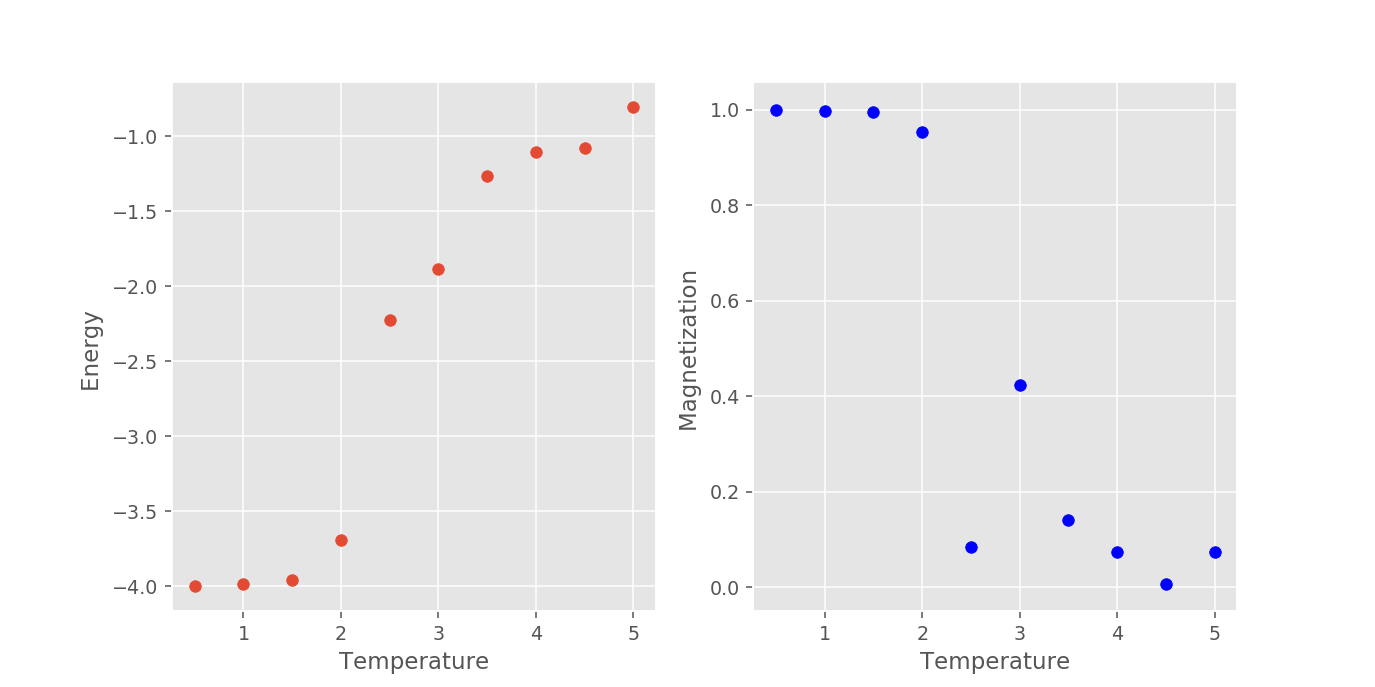

In [114]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описыввают ли они поведение феромагнетиков и фазовые переходы?

Уже из графика видно, что при определённой температуре система испытывает фазовый переход - происходит скачкообразное изменение энергии и намагниченности

Дополнительно. Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое. 

<IPython.core.display.Javascript object>


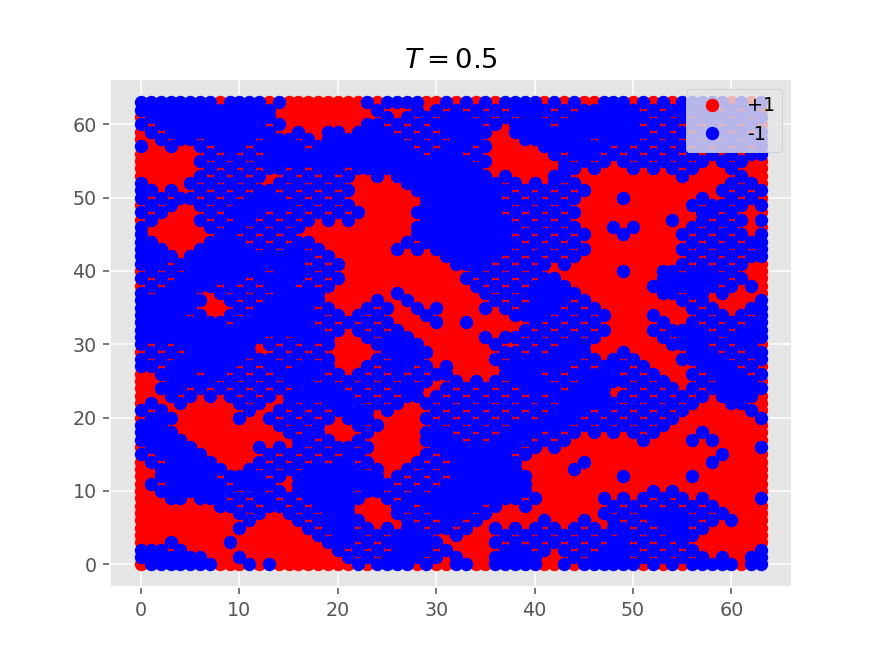

In [153]:
def getUpsDowns(state):
    ### Создаём массивы точек со спинами +1 и -1
    N = state.shape[0]
    ups = []
    downs = []
    for i in range(N):
        for j in range(N):
            if state[i][j] > 0:
                downs.append([i, j])
            else:
                ups.append([i, j])

    ups = np.array(ups)
    downs = np.array(downs)
    
    return ups, downs

N = 64
state = getInitialState(N)

for i in range(4): 
    makeFlip(0.5, state)
            
ups, downs = getUpsDowns(state)
        
fig, ax = plt.subplots() 
ax.plot(ups[:,0], ups[:,1], 'bo', color = 'red', label='+1')
ax.plot(downs[:,0], downs[:,1], 'bo', color = 'blue', label='-1')
ax.set_title('$T = 0.5$')
ax.legend()

<IPython.core.display.Javascript object>


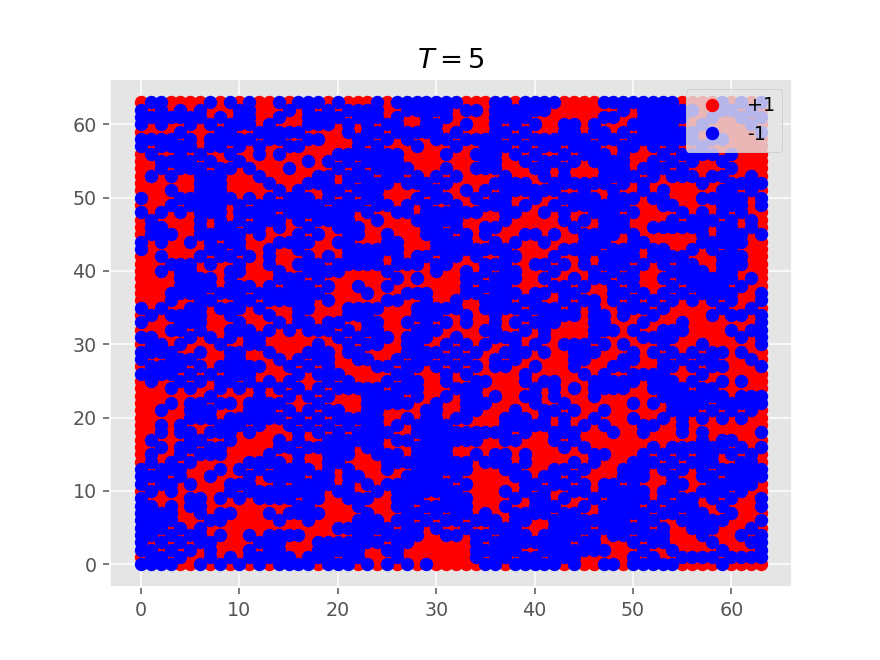

In [152]:
N = 64
state = getInitialState(N)

for i in range(4): 
    makeFlip(5, state)
            
ups, downs = getUpsDowns(state)
        
fig, ax = plt.subplots() 
ax.plot(ups[:,0], ups[:,1], 'bo', color = 'red', label='+1')
ax.plot(downs[:,0], downs[:,1], 'bo', color = 'blue', label='-1')
ax.set_title('$T = 5$')
ax.legend()

На полученных графиках наглядно видно, что при маленьких температурах спины образуют домены, а при больших температурах положение спинов неупорядоченно.